## 1. 用户数据处理
每一行表示一个用户的数据，以`::`隔开，第一列到最后一列分别表示`UserID`、`Gender`、`Age`、`Occupation`、`Zip-code`，各数据对应关系如下:
- UserID： 每个用户的数字代号
- Gender： F表示女性，M表示男性
- Age：用数字表示各个年龄段
- Occupation： 用数字表示不同职业
- zip-code： 邮政编码，与用户所处的地理位置有关。在本次实验中，不使用这个数据。

In [1]:
import numpy as np
import pandas as pd

user_file = './data/users.dat'

# 读取用户数据
with open(user_file, 'r') as f:
    user_data = f.readlines()

print(len(user_data))
print(user_data[0])
print(type(user_data[0]))

6040
1::F::1::10::48067

<class 'str'>


用户的性别F、M是字母数据，这里需要转换成数字表示

In [2]:
def gender2num(gender):
    """将性别从字符转换为数字"""
    return 1 if gender == 'F' else 0

user_info = {}
max_user_id = 0

for item in user_data:
    item = item.strip().split('::')
    user_id = item[0]
    user_info[user_id] = {
        'user_id': int(user_id),
        'gender': gender2num(item[1]),
        'age': int(item[2]),
        'job': int(item[3])
    }
    max_user_id = max(max_user_id, int(user_id))

print(user_info['3'])

{'user_id': 3, 'gender': 0, 'age': 25, 'job': 15}


简单绘制用户信息图：
1. 性别来看，男性居多
2. 年龄来看，年轻人居多
3. 职业来看，学生(4)、管理(7)、程序员(12)、工程师(17)以及作家(20)居多

In [3]:
import seaborn as sns

In [4]:
user_table = {
    'user_id': [],
    'gender': [],
    'age': [],
    'job': []
}
for k, v in user_info.items():
    user_table['user_id'].append(v['user_id'])
    user_table['gender'].append(v['gender'])
    user_table['age'].append(v['age'])
    user_table['job'].append(v['job'])

user_table = pd.DataFrame(user_table)
user_table.head()

,user_id,gender,age,job
0,1,1,1,10
1,2,0,56,16
2,3,0,25,15
3,4,0,45,7
4,5,0,25,20


<AxesSubplot:xlabel='gender', ylabel='count'>

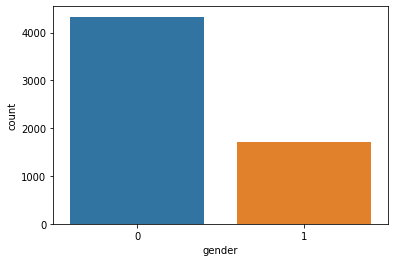

In [5]:
sns.countplot(x='gender', data=user_table)

<AxesSubplot:xlabel='age', ylabel='count'>

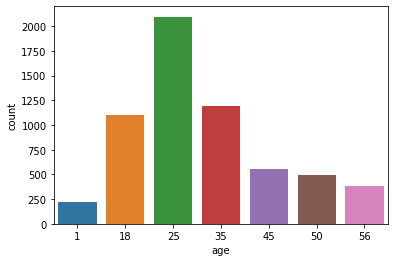

In [6]:
sns.countplot(x='age', data=user_table)

<AxesSubplot:xlabel='job', ylabel='count'>

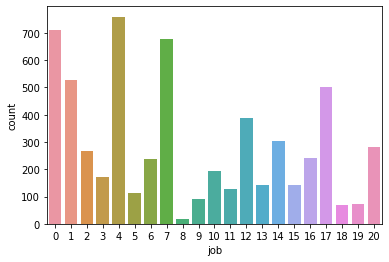

In [7]:
sns.countplot(x='job', data=user_table)

## 2. 电影数据处理
每一行表示一条电影数据信息，数据格式为：`MovieID::Title::Genres`
- MovieID： 每个电影的数字代号
- Title： 每个电影的名字和首映时间
- Genres： 电影的种类，每个电影不止一个类别，不同类别以`|`隔开

In [8]:
movie_info_file = './data/movies.dat'

with open(movie_info_file, 'r', encoding="ISO-8859-1") as f:
    movie_data = f.readlines()

item = movie_data[0]
print(item)
item = item.strip().split('::')
print('movie id: ' , item[0])
print('movie title: ' , item[1][:-7])
print('movie year: ' , item[1][-5:-1])
print('movie type: ' , item[2].split('|'))

1::Toy Story (1995)::Animation|Children's|Comedy

movie id:  1
movie title:  Toy Story
movie year:  1995
movie type:  ['Animation', "Children's", 'Comedy']


In [9]:
movie_info = {}
for item in movie_data:
    item = item.strip().split('::')
    movie_id = item[0]
    movie_info[movie_id] = {'movie_id': int(movie_id)}

max_movie_id = max([movie_info[k]['movie_id'] for k in movie_info.keys()])

print(max_movie_id)

3952


电影数据中Title和Genres都是长文本信息，为了便于后续神经网络计算，我们把其中每个单词都拆分出来，不同的单词用对应的数字序号指代。所以，我们需要对这些数据进行如下处理：
1. 统计电影名字的单词，并给每个单词一个数字序号
2. 统计电影类别单词，并给每个单词一个数字序号

In [10]:
# 用于记录电影title每个单词对应哪个序号
movie_titles = {}

# 记录电影名字包含的单词最大数量
max_title_length = 0

# 对不同的单词从1开始计数
t_count = 1

for item in movie_data:
    item = item.strip().split('::')
    v_id = item[0]
    v_title = item[1][:-7]
    v_year = item[1][-5:-1]
    titles = v_title.split()
    # 获取title的最大长度
    max_title_length = max(max_title_length, len(titles))

    for t in titles:
        if t not in movie_titles:
            movie_titles[t] = t_count
            t_count += 1

    v_tit = [movie_titles[k] for k in titles]
    movie_info[v_id] = {
        'movie_id': int(v_id),
        'title': v_tit,
        'year': int(v_year)
    }

print('电影最长title长度为：', max_title_length)
item = movie_data[0]
item = item.strip().split('::')
print('电影id为：', item[0])
print('电影title为：', item[1][:-7])
print('id为1的电影数据为：', movie_info['1'])

电影最长title长度为： 15
电影id为： 1
电影title为： Toy Story
id为1的电影数据为： {'movie_id': 1, 'title': [1, 2], 'year': 1995}


In [11]:
# 用来存放电影类型
movie_cat = {}

# 记录电影类型包含的单词最大数量
max_cat_length = 0

# 对不同的单词从1开始计数
c_count = 1

for item in movie_data:
    item = item.strip().split('::')
    v_id = item[0]
    cats = item[2].split('|')

    max_cat_length = max(max_cat_length, len(cats))

    for cat in cats:
        if cat not in movie_cat:
            movie_cat[cat] = c_count
            c_count += 1

    v_cat = [movie_cat[k] for k in cats]

    movie_info[v_id] = {
        'movie_id': int(v_id),
        'category': v_cat
    }

print('电影类别最多为：', max_cat_length)
item = movie_data[0]
item = item.strip().split('::')
print('电影id为：', item[0])
print('电影类别为：', item[2].split('|'))
print('id为1的电影数据为：', movie_info['1'])

电影类别最多为： 6
电影id为： 1
电影类别为： ['Animation', "Children's", 'Comedy']
id为1的电影数据为： {'movie_id': 1, 'category': [1, 2, 3]}


由于每个电影名字和类别的单词数量不一样，转换成数字表示时，还需要通过补0将其补全成固定数据长度

In [12]:
movie_info, movie_titles, movie_cat = {}, {}, {}
t_count, c_count = 1, 1

for item in movie_data:
    item = item.strip().split('::')
    v_id = item[0]
    v_title = item[1][:-7]
    v_year = item[1][-5:-1]
    cats = item[2].split('|')

    titles = v_title.split()

    for t in titles:
        if t not in movie_titles:
            movie_titles[t] = t_count
            t_count += 1

    for cat in cats:
        if cat not in movie_cat:
            movie_cat[cat] = c_count
            c_count += 1

    v_tit = [movie_titles[k] for k in titles]
    while len(v_tit) < 15:
        v_tit.append(0)

    v_cat = [movie_cat[k] for k in cats]
    while len(v_cat) < 6:
        v_cat.append(0)

    movie_info[v_id] = {
        'movie_id': int(v_id),
        'title': v_tit,
        'year': int(v_year),
        'category': v_cat
    }

print('电影数据量为：', len(movie_info))
ID = 3
print('原始的电影id为{}的数据为：{}'.format(ID, movie_data[ID-1]))
print('处理后电影id为{}的数据为：{}'.format(ID, movie_info[str(ID)]))

电影数据量为： 3883
原始的电影id为3的数据为：3::Grumpier Old Men (1995)::Comedy|Romance

处理后电影id为3的数据为：{'movie_id': 3, 'title': [4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'year': 1995, 'category': [3, 6, 0, 0, 0, 0]}


## 3. 评分数据处理
评分数据格式为`UserID::MovieID::Rating::Timestamp`

In [13]:
use_poster = False
if use_poster:
    rating_file = './data/new_rating.txt'
else:
    rating_file = './data/ratings.dat'

with open(rating_file, 'r') as f:
    rating_data = f.readlines()

item = rating_data[0]
print(item)

item = item.strip().split('::')
user_id, movie_id, score = item[0], item[1], item[2]
print('评分数据共有：', len(rating_data))
print('用户id：', user_id)
print('电影id：', movie_id)
print('用户对电影的评分：', score)

1::1193::5::978300760

评分数据共有： 1000209
用户id： 1
电影id： 1193
用户对电影的评分： 5


In [14]:
def get_rating_info(path):
    with open(path, 'r') as f:
        data = f.readlines()

    rating_info = {}
    for item in data:
        item = item.strip().split('::')
        user_id, movie_id, score = item[0], item[1], item[2]
        if user_id not in rating_info:
            rating_info[user_id] = {movie_id: float(score)}
        else:
            rating_info[user_id][movie_id] = float(score)
    return rating_info


rating_info = get_rating_info(rating_file)
print('id为1的用户一共评价了{}个电影'.format(len(rating_info['1'])))
print(rating_info['1'])

id为1的用户一共评价了53个电影
{'1193': 5.0, '661': 3.0, '914': 3.0, '3408': 4.0, '2355': 5.0, '1197': 3.0, '1287': 5.0, '2804': 5.0, '594': 4.0, '919': 4.0, '595': 5.0, '938': 4.0, '2398': 4.0, '2918': 4.0, '1035': 5.0, '2791': 4.0, '2687': 3.0, '2018': 4.0, '3105': 5.0, '2797': 4.0, '2321': 3.0, '720': 3.0, '1270': 5.0, '527': 5.0, '2340': 3.0, '48': 5.0, '1097': 4.0, '1721': 4.0, '1545': 4.0, '745': 3.0, '2294': 4.0, '3186': 4.0, '1566': 4.0, '588': 4.0, '1907': 4.0, '783': 4.0, '1836': 5.0, '1022': 5.0, '2762': 4.0, '150': 5.0, '1': 5.0, '1961': 5.0, '1962': 4.0, '2692': 4.0, '260': 4.0, '1028': 5.0, '1029': 5.0, '1207': 4.0, '2028': 5.0, '531': 4.0, '3114': 4.0, '608': 4.0, '1246': 4.0}


## 4. 海报图像读取

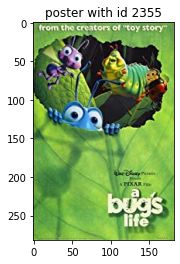

In [15]:
from PIL import Image
import matplotlib.pyplot as plt


use_poster = True
if use_poster:
    rating_file = './data/new_rating.txt'
else:
    rating_file = './data/ratings.dat'

with open(rating_file, 'r') as f:
    rating_data = f.readlines()

movid_id_collect = []
for item in rating_data:
    item = item.strip().split('::')
    user_id, movie_id, score = item[0], item[1], item[2]
    movid_id_collect.append(movie_id)

poster_path = './data/posters/'
idx = 1
poster = Image.open(poster_path + 'mov_id{}.jpg'.format(str(movid_id_collect[idx])))
plt.imshow(poster)
plt.title('poster with id {}'.format(movid_id_collect[idx]))
plt.show()